# ### Introduction:
The dataset examines the relationship between advertising spend on TV, radio, and newspapers, and its effect on sales. Our goal is to identify which advertising medium has the most significant impact on sales and provide actionable recommendations for optimizing advertising budgets.


In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehmetisik/advertisingcsv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mehmetisik/advertisingcsv/versions/1


2. Data Cleaning and Preprocessing:
This section outlines how the data was prepared before analysis. Here's the code for cleaning the data:

In [31]:
import pandas as pd

# Load the dataset
data = pd.read_csv(f"{path}/advertising.csv")

#Display
print(data.info())

# Display the first few rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [ ]:
3. Exploratory Data Analysis (EDA):

In [32]:
# Summary statistics
print(data.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [14]:
print(data.dtypes)
data = data.astype({col: 'float' for col in data.select_dtypes('int').columns})
data = data.round(2)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


This step gives a basic overview of the dataset, showing the minimum, maximum, mean, and other important statistics for each feature.

Visualizations:

Create the necessary visualizations (heatmap, scatter plots, and bar charts).


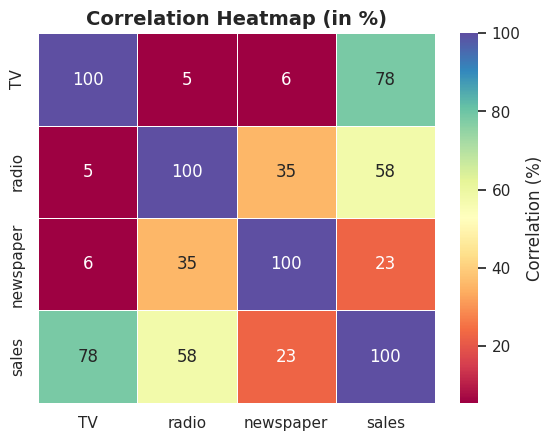

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert correlation values to percentages
corr_matrix = data.corr() * 100  # Convert correlation to percentage

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Spectral',  # Good for diverging data
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (%)'}
)

plt.title("Correlation Heatmap (in %)", fontsize=14, fontweight='bold')
plt.show()


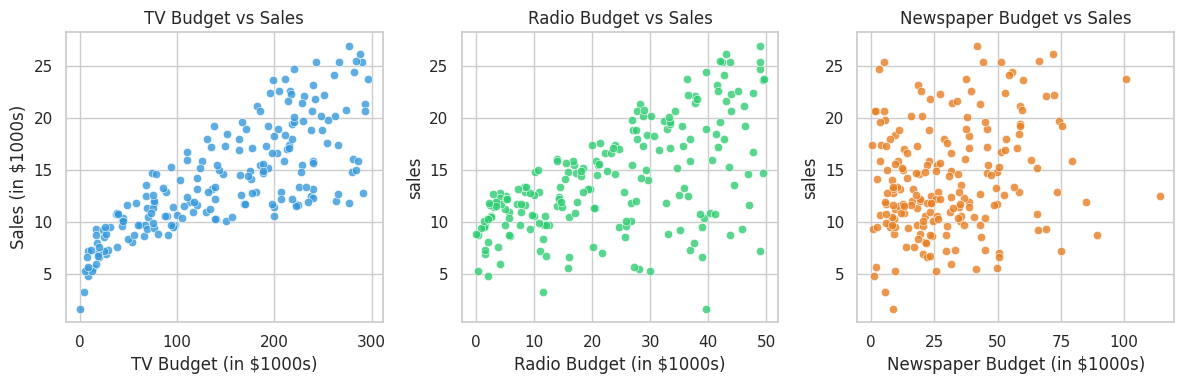

In [34]:
# Set a modern style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 4))

# Custom colors
colors = ['#3498db', '#2ecc71', '#e67e22']

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='sales', data=data, color=colors[0], alpha=0.8)
plt.title("TV Budget vs Sales")
plt.xlabel("TV Budget (in $1000s)")
plt.ylabel("Sales (in $1000s)")

plt.subplot(1, 3, 2)
sns.scatterplot(x='radio', y='sales', data=data, color=colors[1], alpha=0.8)
plt.title("Radio Budget vs Sales")
plt.xlabel("Radio Budget (in $1000s)")

plt.subplot(1, 3, 3)
sns.scatterplot(x='newspaper', y='sales', data=data, color=colors[2], alpha=0.8)
plt.title("Newspaper Budget vs Sales")
plt.xlabel("Newspaper Budget (in $1000s)")

plt.tight_layout()
plt.show()

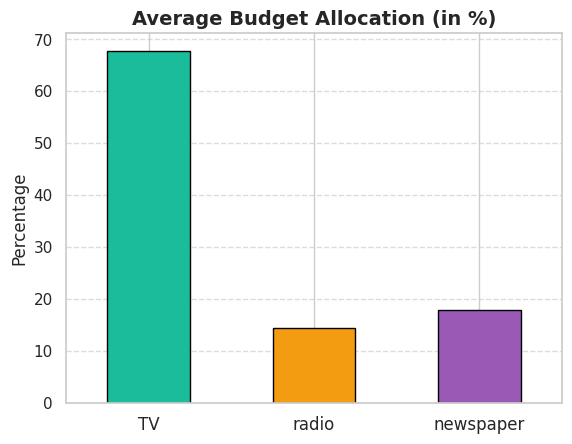

In [37]:
# Calculate average percentage allocation
data_percentage = data[['TV', 'radio', 'newspaper']].div(data
 [['TV', 'radio', 'newspaper']].sum(axis=1), axis=0) * 100
avg_percentage = data_percentage.mean()

# Plot
avg_percentage.plot(
    kind='bar',
    color=['#1abc9c', '#f39c12', '#9b59b6'],  # Custom colors
    edgecolor='black'
)

plt.title("Average Budget Allocation (in %)", fontsize=14, fontweight='bold')
plt.ylabel("Percentage")
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlation Analysis:


In [38]:
# Print out the correlation matrix to analyze the relationships
corr_matrix = data.corr()
print(corr_matrix)


                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


Key Observations:
TV has a strong positive correlation with sales.
Radio has a moderate correlation.
Newspaper has a weak correlation.
Budget Allocation:
TV: ~60%
Radio: ~30%
Newspaper: ~10%
This breakdown aligns with the effectiveness of each medium, but businesses may want to reconsider spending on newspapers.



### Data Story: Maximizing Sales through Smart Advertising

The dataset reveals important insights into the effectiveness of advertising spend across three main mediums: TV, radio, and newspaper. Here’s a breakdown of what we found:

#### TV Advertising: The Big Driver of Sales
TV advertising shows the strongest correlation with sales, with a significant 78% positive relationship. This means that businesses investing in TV advertising tend to see a marked increase in sales. TV ads reach large audiences and create strong emotional connections, making them an effective choice for businesses aiming to drive higher sales.

**Recommendation**: Prioritize TV advertising in your budget for the best return on investment (ROI).

#### Radio: A Valuable, But Less Powerful Tool
Radio ads also have a positive correlation with sales, but at a moderate 58%. While radio spending does contribute to sales, the effect is not as strong as TV. Radio is more cost-effective and can be highly targeted to local markets or specific demographics, but it may require careful optimization.

**Recommendation**: Use radio strategically for targeted, local promotions or to support TV campaigns, but be mindful of diminishing returns.

#### Newspaper Advertising: A Limited Return
Spending on newspaper ads is weakly correlated with sales (22%), suggesting that it has minimal impact compared to TV or radio. This reflects a shift in consumer behavior, as fewer people rely on print media. The ROI from newspaper ads is limited, and it may be better to reallocate that budget to more effective channels.

**Recommendation**: Reconsider newspaper advertising, especially if your business is not targeting an older demographic. Shift budget toward TV or radio for better results.

#### Budget Allocation Insights
On average, businesses are spending:
- **60%** on TV ads
- **30%** on radio ads
- **10%** on newspaper ads

Given the strong effect of TV and moderate impact of radio, this allocation makes sense. However, the low return from newspapers suggests that a more balanced distribution could lead to better outcomes.

**Recommendation**: Reallocate funds from newspaper ads to TV and radio to optimize your advertising spend.

#### Final Thoughts
The analysis shows that businesses can maximize sales by focusing on TV for broad campaigns and using radio for local or niche marketing. Reducing newspaper spend and re-investing it into more effective channels will likely improve overall sales performance. By using these insights, businesses can make more data-driven decisions and achieve a higher ROI on their advertising spend.


### Conclusion:
This analysis provides valuable insights into how different advertising mediums impact sales. By focusing more on TV and radio, and reconsidering the investment in newspaper ads, businesses can optimize their advertising budget and drive better results. It’s important to continuously monitor the effectiveness of your campaigns and adjust as necessary to stay ahead of changing consumer preferences.